# Inline magic to load IRKernel extension

In [2]:
%load_ext rpy2.ipython

# Process image using R

In [8]:
%%R
library(magick)
im1 <- image_read('/opt/eodata/Landsat-5/TM/L1T/2011/07/15/LS05_RMTI_TM__GTC_1P_20110715T093254_20110715T093322_145580_0190_0023_F030/LS05_RMTI_TM__GTC_1P_20110715T093254_20110715T093322_145580_0190_0023_F030.BP.PNG')
kern <- matrix(0, ncol = 3, nrow = 3)
kern[1, 2] <- 0.25
kern[2, c(1, 3)] <- 0.25
kern[3, 2] <- 0.25
kern
img_blurred <- image_convolve(im1, kern)
compare<-image_compare(im1,img_blurred)
image_write(compare, "compare.png")


/opt/conda/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Linking to ImageMagick 6.9.7.4
Enabled features: fontconfig, freetype, fftw, lcms, pango, x11
Disabled features: cairo, ghostscript, rsvg, webp

  warnings.warn(x, RRuntimeWarning)


# Display inline

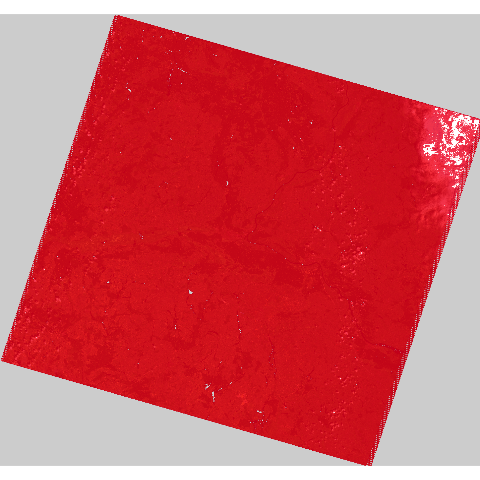

In [10]:
%%R
grid::grid.raster(compare)

# Display on map using Python

In [13]:
layer=ImageLayer()
box=layer.getbb('/opt/eodata/Landsat-5/TM/L1T/2011/07/15/LS05_RMTI_TM__GTC_1P_20110715T093254_20110715T093322_145580_0190_0023_F030')
print(box)
layer.addImageLayer('compare.png', box, 'Image compare')
layer.showLayer()

[[52.041900,19.840400],[54.142300,16.418400]]
